# Vessels API Example

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
And put your API key in a `SIGNAL_OCEAN_API_KEY` environment variable.

In [ ]:
pip install signal-ocean


In [1]:
signal_ocean_api_key = '' #replace with your subscription key

In [2]:
from signal_ocean.vessels import VesselsAPI
import pandas as pd
import seaborn as sns
from datetime import datetime
from signal_ocean import Connection
connection = Connection(signal_ocean_api_key)

## Call the vessels API
The Vessels API retrieves vessel information.

In [3]:
api = VesselsAPI(connection)

#### Get vessel classes

In [4]:
vessel_classes = api.get_vessel_classes()

In [5]:
aframax_vesel_class = next(vc for vc in vessel_classes if vc.name=='Aframax')
aframax_vesel_class

VesselClass(id=86, vessel_type_id=1, from_size=82000, to_size=124999, name='Aframax', vessel_type='Tanker', defining_size='DeadWeight', size='kt')

In [6]:
pd.DataFrame([vc.__dict__ for vc in vessel_classes]).tail(5)

,id,vessel_type_id,from_size,to_size,name,vessel_type,defining_size,size
25,90,1,0,24999,Small,Tanker,DeadWeight,kt
26,91,5,0,550000,LNG,LNG,CubicSize,cbm
27,92,3,0,19999,Small,Dry,DeadWeight,kt
28,94,1,350000,550000,ULCC,Tanker,DeadWeight,kt
29,95,4,0,1000,Small,Container,TEU,TEU


#### Get vessel types

In [7]:
vessel_types = api.get_vessel_types()

In [8]:
tanker_vessel_type = next(vt for vt in vessel_types if vt.name=='Dry')
tanker_vessel_type

VesselType(id=3, name='Dry')

In [9]:
pd.DataFrame([vc.__dict__ for vc in vessel_types]).tail(3)

,id,name
4,4,Container
5,1,Tanker
6,5,LNG


#### Get details for a specific vessel

In [10]:
imo = 9436006
v = api.get_vessel(imo)
print(f'{v.imo}: {v.vessel_name} ({v.vessel_class} / {v.commercial_operator})')

9436006: Stealth Chios (Aframax / Stealth Maritime Corp)


#### Get details for all vessels

In [11]:
vessels = api.get_vessels()

In [12]:
len(vessels)

43243

In [13]:
df = pd.DataFrame([x.__dict__ for x in vessels])

In [14]:
df.columns

Index(['imo', 'vessel_type_id', 'built_for_trade_id', 'trade_id',
       'vessel_class_id', 'commercial_operator_id', 'deadweight',
       'breadth_extreme', 'gross_rated_tonnage', 'reduced_gross_tonnage',
       'net_rated_tonnage', 'draught', 'length_overall', 'moulded_depth',
       'year_built', 'geared', 'clean_dirty_willing',
       'main_engine_manufacturer_id', 'classification_register_id',
       'updated_date', 'vessel_name', 'call_sign', 'vessel_type',
       'built_for_trade', 'trade', 'vessel_class', 'flag_code', 'flag',
       'commercial_operator', 'built_country_code', 'built_country_name',
       'scrapped_date', 'shipyard_built_id', 'shipyard_built_name',
       'ice_class', 'cranes_ton_capacity', 'teu', 'te_u14', 'reefers',
       'panama_canal_net_tonnage', 'cubic_size', 'scrubbers_date',
       'summer_tpc', 'lightship_tonnes', 'main_engine_manufacturer',
       'delivery_date', 'classification_register', 'number_of_holds',
       'grain_capacity', 'bale_capacity']

In [15]:
df[['imo', 'vessel_name', 'vessel_class']].sample(10)

,imo,vessel_name,vessel_class
22689,9346160,Tesoro,Supramax
228,6321605,FSO Yoho,Unknown
40462,9799961,Yard: Jiangsu New Yangzijiang Hull: 2015-1233,Unknown
17409,9236822,Kang Fu,Supramax
3853,7923720,Aqua Vitae,Small
35348,9672662,Shin Taiyo Maru,Small
39547,9776420,Cma Cgm Jean Mermoz,ULCV
38909,9756054,Nikkou Maru,Small
19438,9286645,Wooyang Banders,Panamax
3339,7810753,Tiga Roda,Small


#### Find fleet size per vessel class

In [16]:
df[pd.isnull(df['scrapped_date'])]['vessel_class'].value_counts().to_frame('vessel_count').head(10)

,vessel_count
Small,11183
Panamax,3843
Supramax,3254
Handysize,2865
MR2,1753
Post Panamax,1571
Capesize,1515
Feeder,1330
Aframax,1146
VLCC,945


#### Find the commercial operators that currently operate the largest Aframax fleets

In [17]:
data = df[(df['vessel_class']=='Aframax')&(pd.isnull(df['scrapped_date']))]
data['commercial_operator'].value_counts().head(10)

Scorpio Commercial Management    48
Teekay Corp                      48
Sovcomflot                       45
Cardiff Marine                   31
AET                              31
Shell                            29
Minerva Marine                   28
ST Shipping & Transport          26
Thenamaris                       25
Trafigura                        24
Name: commercial_operator, dtype: int64

#### Visualize fleet age by vessel class for VLCC, Suezmax and Aframax Tankers

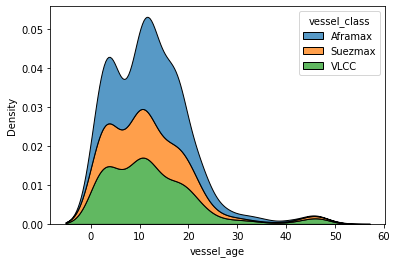

In [18]:
df['vessel_age'] = df.apply(lambda r: datetime.now().year - r['year_built'], axis=1)
data = df[(pd.isnull(df['scrapped_date']))&(df['vessel_class'].isin(['VLCC', 'Suezmax', 'Aframax']))]
sns.kdeplot(data=data, x='vessel_age', hue='vessel_class', multiple="stack");

#### Visualize pairwise relationships for deadweight, length_overall and breadth_extreme for VLCC, Suezmax and Aframax Tankers

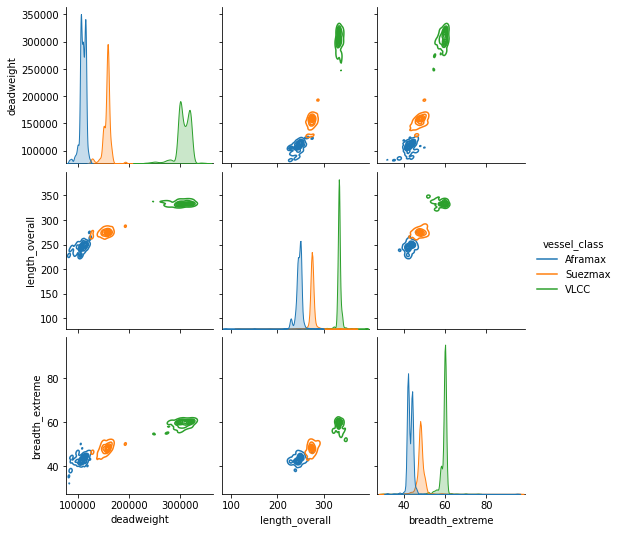

In [19]:
data = df[(pd.isnull(df['scrapped_date']))&(df['vessel_class'].isin(['VLCC', 'Suezmax', 'Aframax']))]
sns.pairplot(data, kind='kde', hue='vessel_class', vars=['deadweight', 'length_overall', 'breadth_extreme']);

#### Get all vessels the name of which contains the term signal

In [20]:
vessels = api.get_vessels('signal')

In [21]:
len(vessels)

2

In [22]:
df = pd.DataFrame([x.__dict__ for x in vessels])

In [23]:
df.head(3)

,imo,vessel_type_id,built_for_trade_id,trade_id,vessel_class_id,commercial_operator_id,deadweight,breadth_extreme,gross_rated_tonnage,reduced_gross_tonnage,...,cubic_size,scrubbers_date,summer_tpc,lightship_tonnes,main_engine_manufacturer,delivery_date,classification_register,number_of_holds,grain_capacity,bale_capacity
0,9412036,1,1,1,86,1926,116337,44,62884,50408,...,126819,None,99.41,19150,MAN B&W,2011-10-31 00:00:00+00:00,Bureau Veritas,None,None,None
1,9773923,1,1,1,86,1926,113221,44,62350,49609,...,123170,None,98.61,20270,MAN B&W,2017-07-20 00:00:00+00:00,Registro Italiano Navale,None,None,None
